# Visualizing CNN Kernels
## Objective
Understand how different convolutional kernels process and extract features from images.

## Setup

In [82]:
# Import required libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

from keras.models import Sequential
from keras.layers import Conv2D
from tensorflow.keras.preprocessing.image import img_to_array, load_img

In [83]:
# Load and prepare data
path = "material/pixel.jpg" # replace with your own image if you want (remove or edit rotatio to fit new pic).
img = Image.open(path).convert('L').rotate(270).resize((150,150)) 
image_array = tf.keras.utils.img_to_array(img) # Convert to tensor
image_array = tf.expand_dims(image_array, 0)  # Create a batch

print(np.shape(image_array))
print(image_array)

(1, 150, 150, 1)
tf.Tensor(
[[[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]], shape=(1, 150, 150, 1), dtype=float32)


## Exercise

### Define different kernels
Create various kernels to see the different effects (edge detection, sharpening, blurring etc)

[[-1 -1 -1]
 [-1  8 -1]
 [-1 -1 -1]]


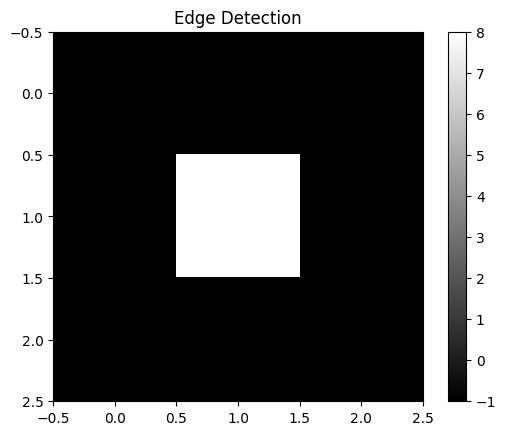

[[ 0 -1  0]
 [-1  5 -1]
 [ 0 -1  0]]


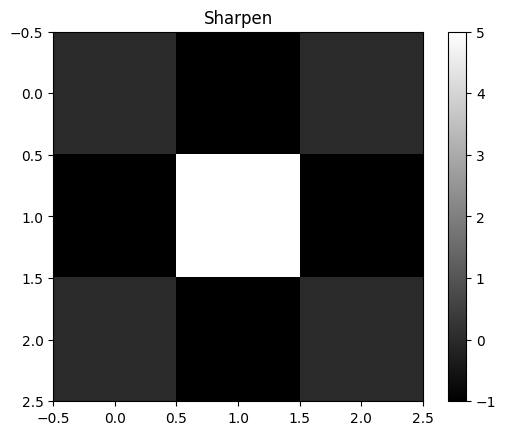

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


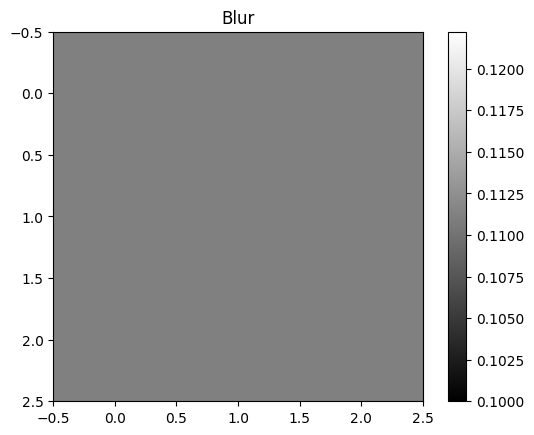

In [84]:

kernels = {
    "Edge Detection": np.array([[-1, -1, -1],
                                [-1, 8, -1],
                                [-1, -1, -1]]),
    
    "Sharpen": np.array([[0, -1, 0],
                         [-1, 5, -1],
                         [0, -1, 0]]),
    
    "Blur": np.array([[1, 1, 1],
                      [1, 1, 1],
                      [1, 1, 1]]) / 9.0,
}

for name, kernel in kernels.items():
    print(kernel)
    
    plt.imshow(kernel, cmap='gray')
    plt.title(name)
    plt.colorbar()
    plt.show()

### Apply Kernels to the Image
Create a simple CNN model with a single convolutional layer for each kernel.
Apply the kernel to the image and display the output.

edge_detection_kernel=(3, 3, 1, 1)
processed_image=(1, 150, 150, 1)
processed_image=(150, 150)


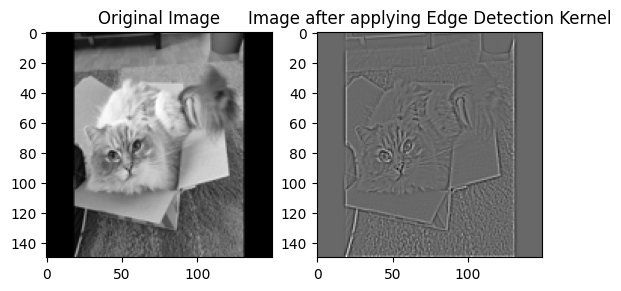

In [85]:
# My own code in order to make sense of stuff.



# why tf do we need to reshape it into this?
edge_detection_kernel = kernels['Edge Detection'].reshape(3, 3, 1, 1)
print(f'edge_detection_kernel={np.shape(edge_detection_kernel)}')

model = Sequential([
    Conv2D(
        filters=1,
        kernel_size=(3, 3),
        
        # so we won't lose any pixels. input and output shape will be identical.
        # comment this out in order to see the number of pixels missing
        padding='same',
        input_shape=(150, 150, 1),
        kernel_initializer=tf.constant_initializer(edge_detection_kernel), # Manually specify what filter to use
    )
])

fig = plt.figure()
fig.add_subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")

# It's called model.predict, even though we aren't predicting anything and simply running a conv later.
processed_image = model.predict(image_array, verbose=0)

# Reshape image to be (150, 150) so that imshow will accept it
print(f'processed_image={np.shape(processed_image)}')
processed_image = processed_image[0, :, :, 0]
print(f'processed_image={np.shape(processed_image)}')

fig.add_subplot(1,2,2)
plt.imshow(processed_image, cmap='gray')
plt.title(f"Image after applying Edge Detection Kernel")
plt.show()

In [86]:
def apply_kernel_and_display(kernel, kernel_name, image):
    model = Sequential([
        Conv2D(
            filters=1,
            kernel_size=(3, 3),
            padding='same',
            input_shape=(150, 150, 1),
            kernel_initializer=tf.constant_initializer(kernel)
        )
    ])

    fig = plt.figure()
    fig.add_subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title("Original Image")

    processed_image = model.predict(image, verbose=0)
    processed_image = processed_image[0, :, :, 0]
    fig.add_subplot(1,2,2)
    plt.imshow(processed_image, cmap='gray')
    plt.title(f"Image after applying {kernel_name} Kernel")
    plt.show()

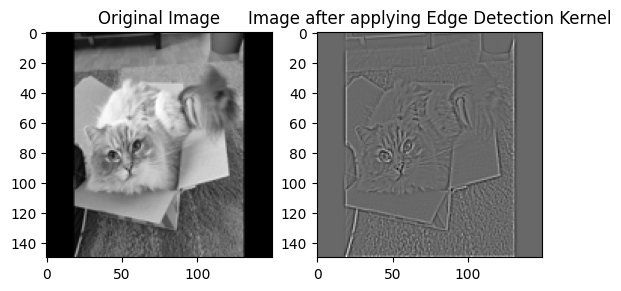

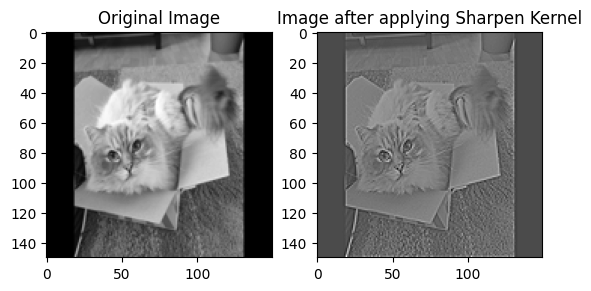

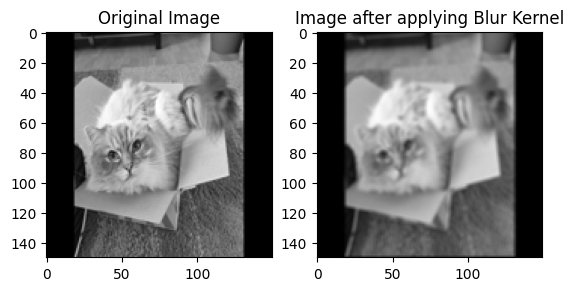

In [87]:
for name, kernel in kernels.items():
    apply_kernel_and_display(kernel.reshape(3, 3, 1, 1), name, image_array)

# Excercise 1
* Compare and Contrast: Discuss how each kernel affects the image differently.
* Feature Extraction: Analyze which features are highlighted by each kernel.
* Real-World Application: Relate the kernels to practical applications in image processing.

# Excercise 2
What are these kernels created to find?

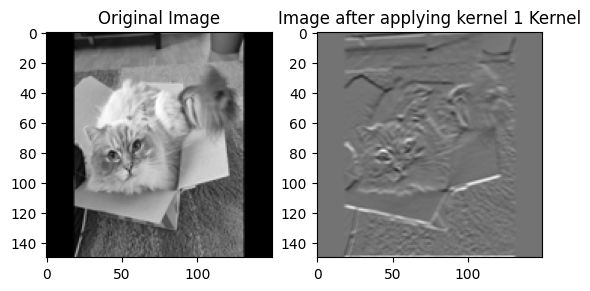

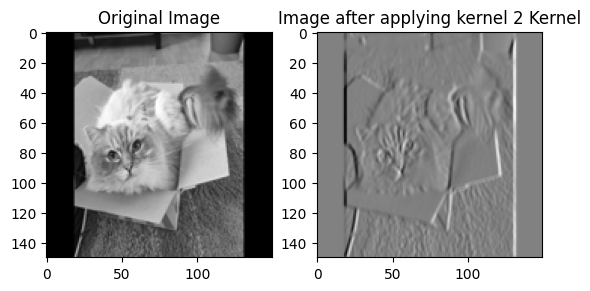

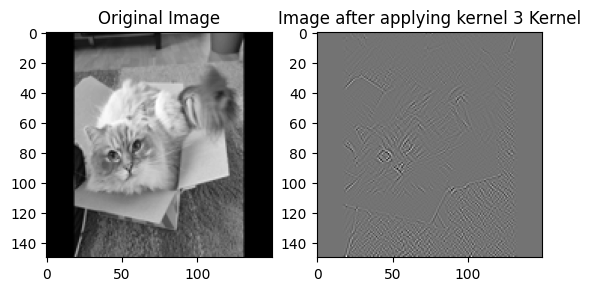

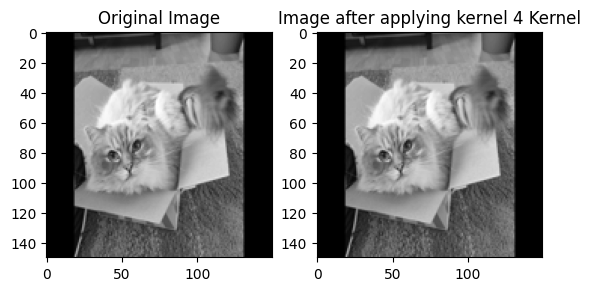

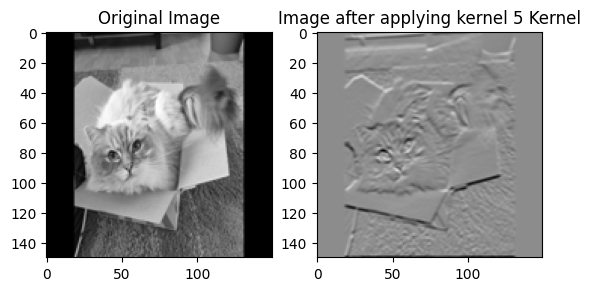

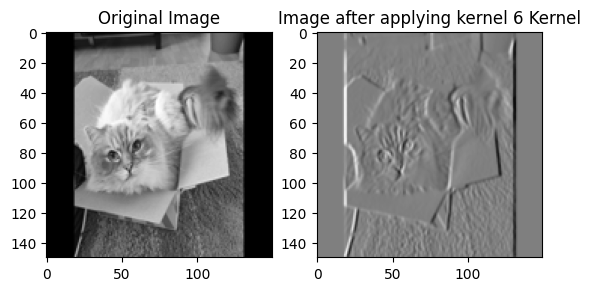

In [89]:
kernels = {
    "kernel 1": np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]]),
    "kernel 2": np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]]),
    "kernel 3": np.array([[1, -2, 1], [-2, 4, -2], [1, -2, 1]]),
    "kernel 4": np.array([[0, 0, 0], [0, 1, 0],  [0, 0, 0]]),
    "kernel 5": np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]]),
    "kernel 6": np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]),
}

for name, kernel in kernels.items():
    apply_kernel_and_display(kernel.reshape(3, 3, 1, 1), name, image_array)


## Bonus Exercise:
Play around with the filters and see if you can create your own that finds some interensting feature.

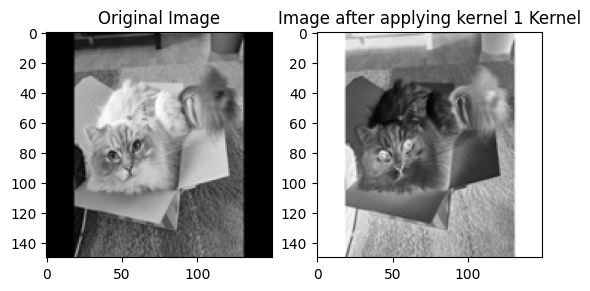

In [99]:
kernels = {
    "kernel 1": np.array([[0, 0, 0],
                          [0, -1, 0],
                          [0, 0, 0]]
    ),
}

for name, kernel in kernels.items():
    apply_kernel_and_display(kernel.reshape(3, 3, 1, 1), name, image_array)